# Visualization

### Matplotlib

In [4]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 6, 1)

gg = pdr.get_data_yahoo("GOOGL", start, end)
gg

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1075.979980,1053.020020,1053.020020,1073.209961,1588300,1073.209961
2018-01-03,1096.099976,1073.430054,1073.930054,1091.520020,1565900,1091.520020
2018-01-04,1104.079956,1094.260010,1097.089966,1095.760010,1302600,1095.760010
2018-01-05,1113.579956,1101.800049,1103.449951,1110.290039,1512500,1110.290039
2018-01-08,1119.160034,1110.000000,1111.000000,1114.209961,1232200,1114.209961
...,...,...,...,...,...,...
2021-05-25,2384.000000,2355.000000,2372.000000,2362.870117,1122000,2362.870117
2021-05-26,2388.989990,2366.459961,2366.520020,2380.310059,1078600,2380.310059
2021-05-27,2389.050049,2356.260010,2389.050049,2362.679932,1761200,2362.679932


<IPython.core.display.Javascript object>


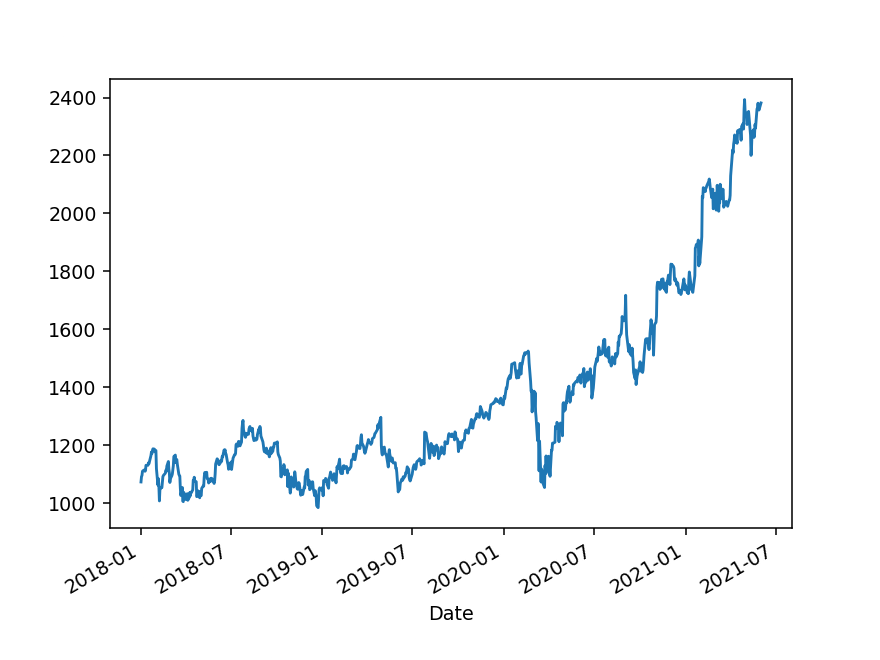

<AxesSubplot:xlabel='Date'>

In [6]:
fig, ax = plt.subplots()
gg['Close'].plot(ax=ax)

In [8]:
gg['MA27'] = gg['Close'].rolling(27).mean()
gg['MA55'] = gg['Close'].rolling(55).mean()

<IPython.core.display.Javascript object>


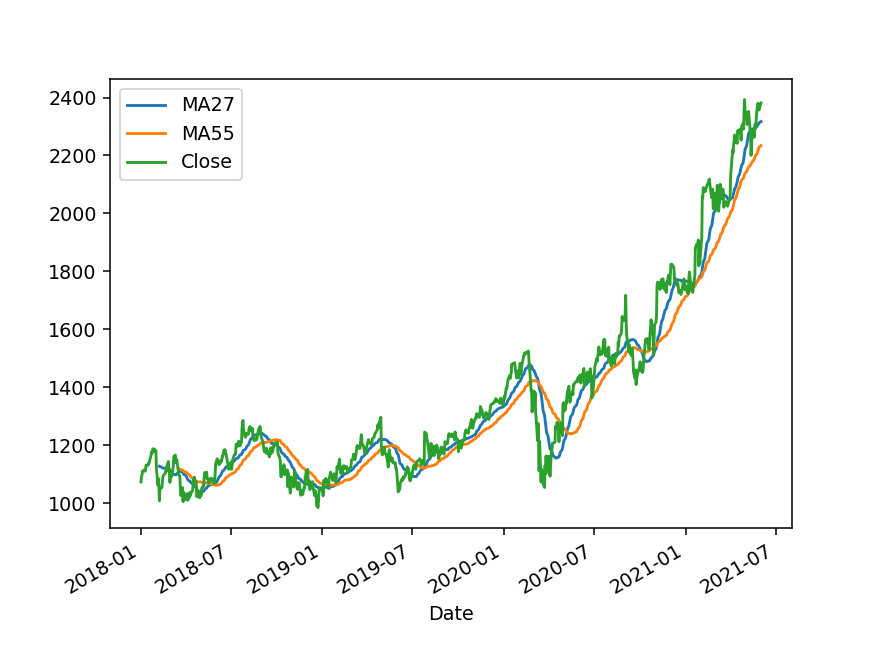

<AxesSubplot:xlabel='Date'>

In [9]:
fig, ax = plt.subplots()
gg[['MA27', 'MA55', 'Close']].plot(ax=ax)

<IPython.core.display.Javascript object>


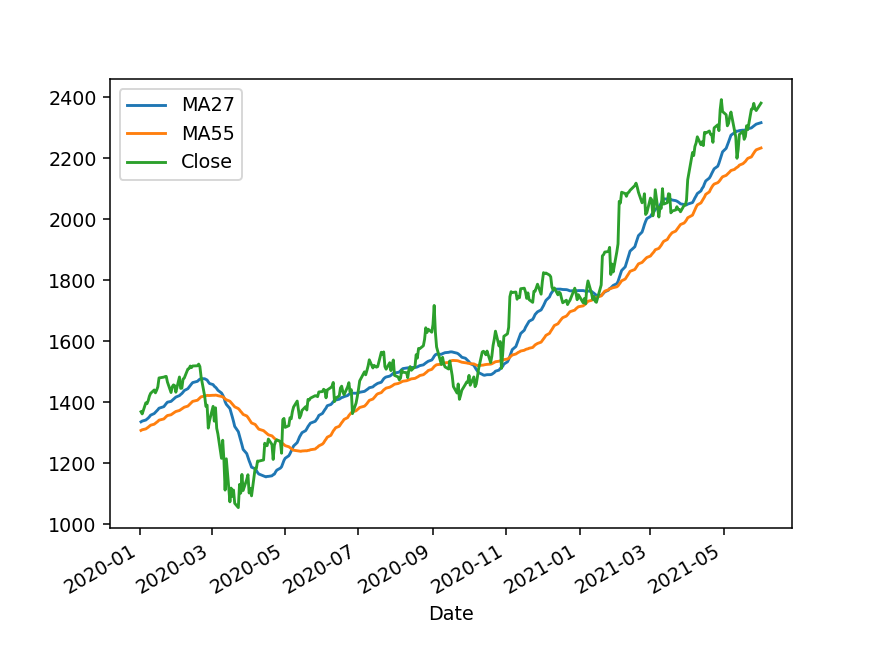

<AxesSubplot:xlabel='Date'>

In [11]:
fig, ax = plt.subplots()
gg[['MA27', 'MA55', 'Close']].loc['2020':].plot(ax=ax)

<IPython.core.display.Javascript object>


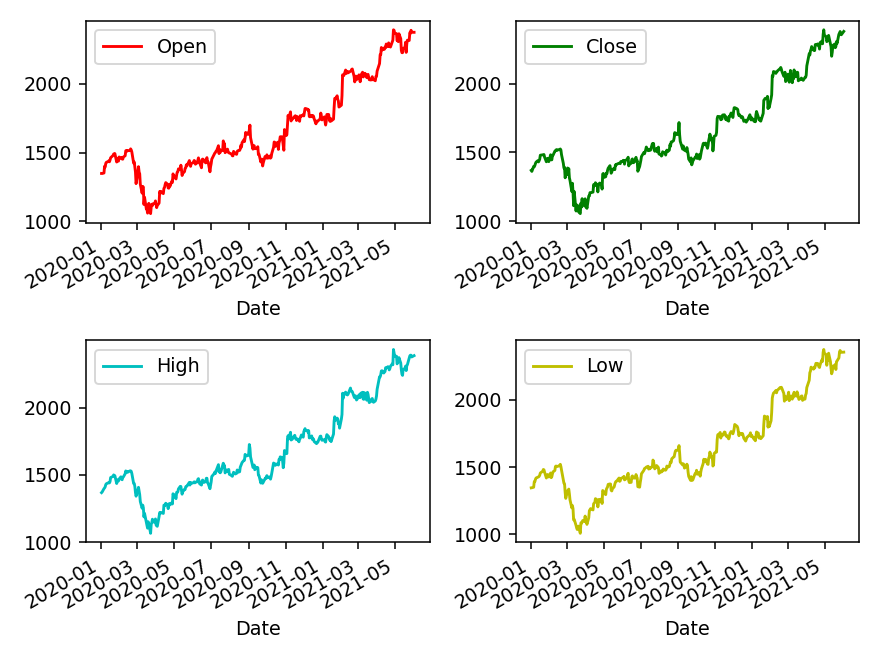

In [15]:
fig, ax = plt.subplots(2, 2)
gg['Open'].loc['2020':].plot(ax=ax[0, 0], c='r')
gg['Close'].loc['2020':].plot(ax=ax[0, 1], c='g')
gg['High'].loc['2020':].plot(ax=ax[1, 0], c='c')
gg['Low'].loc['2020':].plot(ax=ax[1, 1], c='y')
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
plt.tight_layout()

### Project

#### Step 1
- Import the libraries and read data from ticker AAPL and TSLA

In [30]:
tickers = ['MSFT', 'TSLA', 'AMZN']

start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 1, 1)

data = pdr.get_data_yahoo(tickers, start, end)
data.head()

Attributes   Adj Close                               Close             \
Symbols           MSFT       TSLA         AMZN        MSFT       TSLA   
Date                                                                    
2020-01-02  158.205765  86.052002  1898.010010  160.619995  86.052002   
2020-01-03  156.235825  88.601997  1874.969971  158.619995  88.601997   
2020-01-06  156.639694  90.307999  1902.880005  159.029999  90.307999   
2020-01-07  155.211456  93.811996  1906.859985  157.580002  93.811996   
2020-01-08  157.683731  98.428001  1891.969971  160.089996  98.428001   

Attributes                     High                                 Low  \
Symbols            AMZN        MSFT       TSLA         AMZN        MSFT   
Date                                                                      
2020-01-02  1898.010010  160.729996  86.139999  1898.010010  158.330002   
2020-01-03  1874.969971  159.949997  90.800003  1886.199951  158.059998   
2020-01-06  1902.880005  159.100006  90.311996  1903.689941  156.509995   
2020-01-07  1906.859985  159.669998  94.325996  1913.890015  157.320007   
2020-01-08  1891.969971  160.800003  99.697998  1911.000000  157.949997   

Attributes                                Open                          \
Symbols          TSLA         AMZN        MSFT       TSLA         AMZN   
Date                                                                     
2020-01-02  84.342003  1864.150024  158.779999  84.900002  1875.000000   
2020-01-03  87.384003  1864.500000  158.320007  88.099998  1864.500000   
2020-01-06  88.000000  1860.000000  157.080002  88.094002  1860.000000   
2020-01-07  90.671997  1892.040039  159.320007  92.279999  1904.500000   
2020-01-08  93.646004  1886.439941  158.929993  94.739998  1898.040039   

Attributes      Volume                          
Symbols           MSFT         TSLA       AMZN  
Date                                            
2020-01-02  22622100.0   47660500.0  4029000.0  
2020-01-03  21116200.0   88892500.0  3764400.0  
2020-01-06  20813700.0   50665000.0  4061800.0  
2020-01-07  21634100.0   89410500.0  4044900.0  
2020-01-08  27746500.0  155721500.0  3508000.0

#### Step 2
- Get the Adj Close prise

In [31]:
data = data['Adj Close']
data.head()

Symbols,MSFT,TSLA,AMZN
Date,,,
2020-01-02,158.205765,86.052002,1898.010010
2020-01-03,156.235825,88.601997,1874.969971
2020-01-06,156.639694,90.307999,1902.880005
2020-01-07,155.211456,93.811996,1906.859985
2020-01-08,157.683731,98.428001,1891.969971


#### Step 3
- Normalize the data

In [32]:
norm = data/data.iloc[0]
norm.head()

Symbols,MSFT,TSLA,AMZN
Date,,,
2020-01-02,1.000000,1.000000,1.000000
2020-01-03,0.987548,1.029633,0.987861
2020-01-06,0.990101,1.049458,1.002566
2020-01-07,0.981073,1.090178,1.004663
2020-01-08,0.996700,1.143820,0.996818


#### Step 4
- Visualize the data

<IPython.core.display.Javascript object>


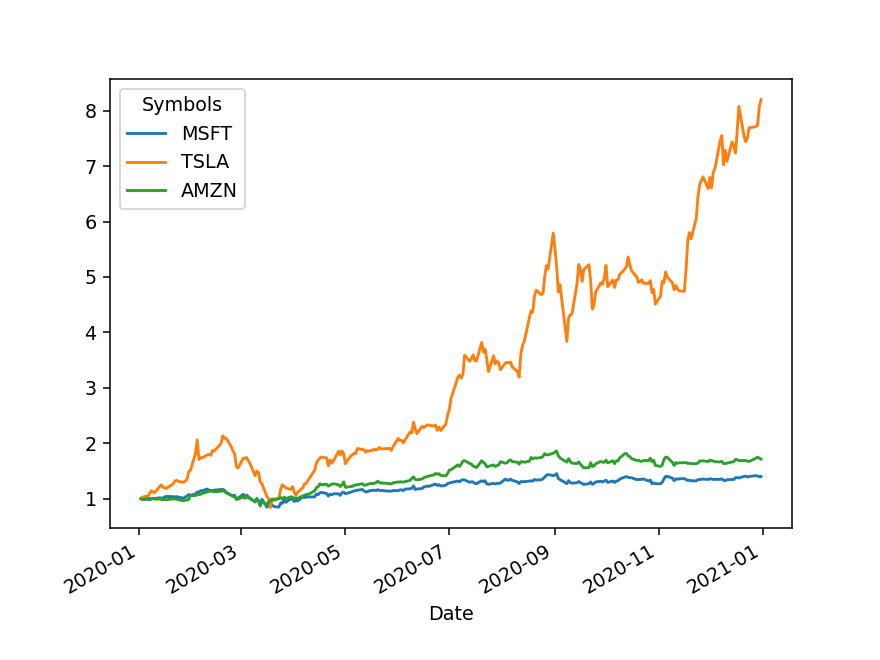

<AxesSubplot:xlabel='Date'>

In [33]:
fig, ax = plt.subplots()
norm.plot(ax=ax)

#### Step 5
- Create a bar chart showing the return

In [34]:
tsla_rtn = norm['TSLA'].iloc[-1] - 1
msft_rtn = norm['MSFT'].iloc[-1] - 1
amzn_rtn = norm['AMZN'].iloc[-1] - 1

In [35]:
tsla_rtn, msft_rtn, amzn_rtn

(7.200506285659165, 0.3994286167871621, 0.7159708931370734)

<IPython.core.display.Javascript object>


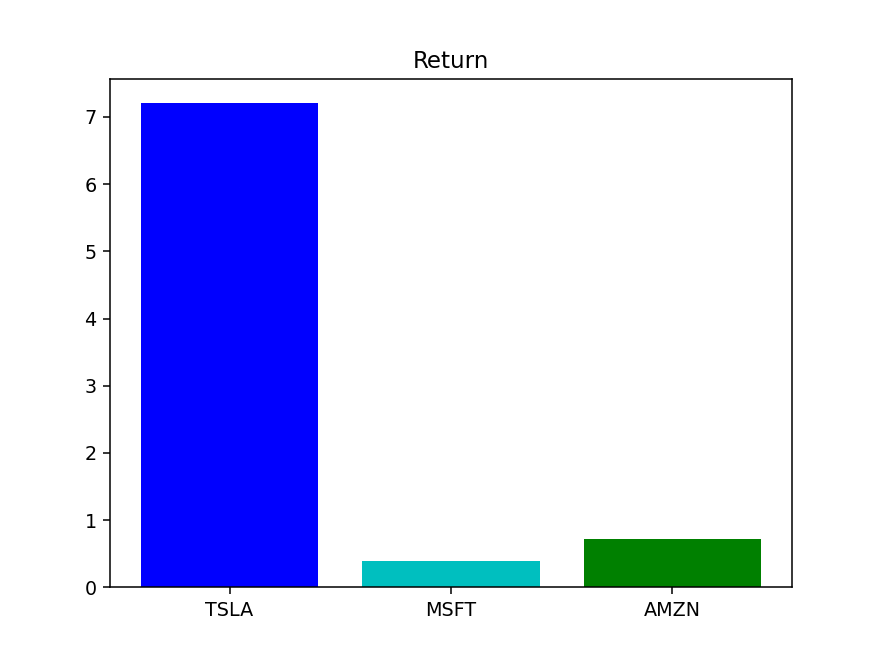

Text(0.5, 1.0, 'Return')

In [36]:
fig, ax = plt.subplots()
ax.bar(['TSLA', 'MSFT', 'AMZN'], [tsla_rtn, msft_rtn, amzn_rtn], color=['b', 'c', 'g'])
ax.set_title("Return")